In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the data

# JOURNEY TIMES

journeytimes_0p17 = pd.read_csv('./outputs/test_outputs/journey_metrics_p1000_evp0.17_tick0.25_5.csv')
journeytimes_0p27 = pd.read_csv('./outputs/test_outputs/journey_metrics_p1000_evp0.27_tick0.25_1.csv')
journeytimes_0p37 = pd.read_csv('./outputs/test_outputs/journey_metrics_p1000_evp0.37_tick0.25_1.csv')
journeytimes_0p47 = pd.read_csv('./outputs/test_outputs/journey_metrics_p1000_evp0.47_tick0.25_1.csv')
journeytimes_0p57 = pd.read_csv('./outputs/test_outputs/journey_metrics_p1000_evp0.57_tick0.25_1.csv')
journeytimes_0p67 = pd.read_csv('./outputs/test_outputs/journey_metrics_p1000_evp0.67_tick0.25_1.csv')

journeytimes_0p17['norm_journey_time'] = journeytimes_0p17['actual_time'] / journeytimes_0p17['ideal_time']
journeytimes_0p27['norm_journey_time'] = journeytimes_0p27['actual_time'] / journeytimes_0p27['ideal_time']
journeytimes_0p37['norm_journey_time'] = journeytimes_0p37['actual_time'] / journeytimes_0p37['ideal_time']
journeytimes_0p47['norm_journey_time'] = journeytimes_0p47['actual_time'] / journeytimes_0p47['ideal_time']
journeytimes_0p57['norm_journey_time'] = journeytimes_0p57['actual_time'] / journeytimes_0p57['ideal_time']
journeytimes_0p67['norm_journey_time'] = journeytimes_0p67['actual_time'] / journeytimes_0p67['ideal_time']

journeytimes = {
    0.17: journeytimes_0p17,
    0.27: journeytimes_0p27,
    0.37: journeytimes_0p37,
    0.47: journeytimes_0p47,
    0.57: journeytimes_0p57,
    0.67: journeytimes_0p67
}

# Combine journey times into one dataframe
combined_journeytimes = pd.concat(journeytimes.values(), keys=journeytimes.keys(), names=['probability', 'index']).reset_index(level='probability')

# EVACUATION DATA
# evacuation probabilities:
# Run 1: 0.17
# Run 2: 0.27
# Run 3: 0.37
# Run 4: 0.47
# Run 5: 0.57
# Run 6: 0.67

evacdata = pd.read_csv('./outputs/test_outputs/gy-evac No_man_left_behind (prob)-table.csv', skiprows=6)

evacdata = evacdata.sort_values(by=['[run number]', 'ticks'])
evacdata.reset_index(drop=True, inplace=True)
evacdata['time-mins'] = evacdata['ticks'] * evacdata['tick-time-in-mins']

evacdata.tail()

,[run number],over-break-p,initial-people,evacuation-probability,tick-time-in-mins,max-walk-distance-km,[step],ticks,get-avg-no-people-per-car,get-no-evacuating-people,get-no-active-cars,time-mins
55240,6,0.06,1000,0.67,0.25,0,8157,8157,1.0,4,4,2039.25
55241,6,0.06,1000,0.67,0.25,0,8158,8158,1.0,4,4,2039.50
55242,6,0.06,1000,0.67,0.25,0,8159,8159,1.0,3,3,2039.75
55243,6,0.06,1000,0.67,0.25,0,8160,8160,1.0,2,2,2040.00
55244,6,0.06,1000,0.67,0.25,0,8161,8161,1.0,1,1,2040.25


In [23]:
combined_journeytimes.tail()

,probability,car_id,passengers,ideal_time,actual_time,norm_journey_time
index,,,,,,
766,0.67,8553,2,13.899643,8057,579.655181
767,0.67,30415,1,10.047500,8059,802.090072
768,0.67,24453,1,14.739643,8060,546.824647
769,0.67,21710,1,14.687143,7861,535.230036
770,0.67,1338,1,12.335000,8162,661.694366


In [3]:
journeytimes[0.17].head()

,car_id,passengers,ideal_time,actual_time,norm_journey_time
0,17497,1,1.4400,47,32.638889
1,10001,1,1.3250,66,49.811321
2,17362,1,1.1275,78,69.179601
3,9539,1,1.8575,78,41.991925
4,23312,2,1.5425,93,60.291734


In [4]:
np.max(evacdata['get-avg-no-people-per-car'])

1.420479302832244

# Journey Times

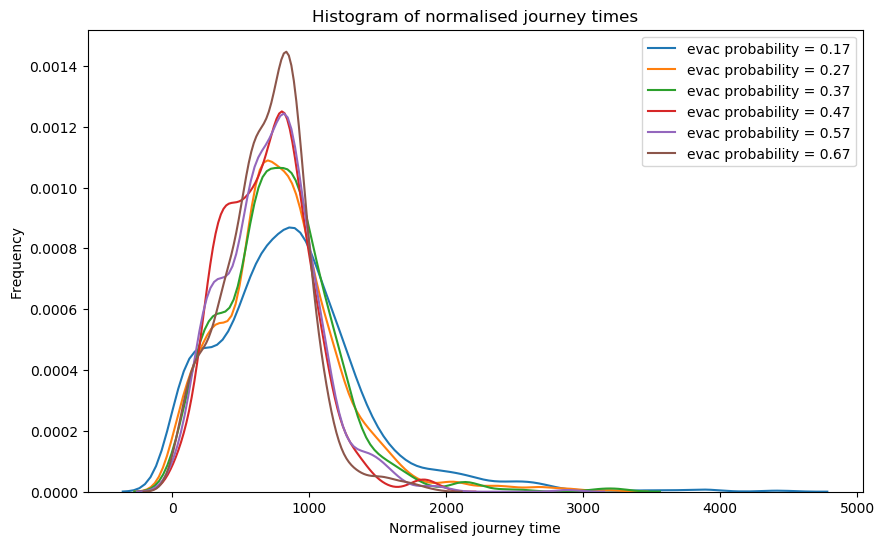

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

#ax.hist(journeytimes['norm_journey_time'], bins=40, density=True)

for probability, data in journeytimes.items():
    sns.kdeplot(data['norm_journey_time'], label=f'evac probability = {probability}')#, density=True)
ax.set_title('Histogram of normalised journey times')
ax.set_xlabel('Normalised journey time')
ax.set_ylabel('Frequency')
#ax.set_xscale('log')

plt.show()


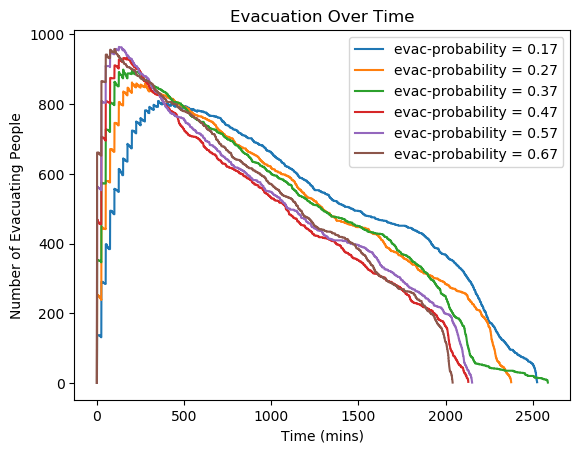

In [6]:
fig, ax = plt.subplots()
#plt.plot(evacdata['time-mins'], evacdata['get-no-evacuating-people'])
probabilities = [0.17, 0.27, 0.37, 0.47, 0.57, 0.67]
for run, probability in zip(evacdata['[run number]'].unique(), probabilities):
    run_data = evacdata[evacdata['[run number]'] == run]
    plt.plot(run_data['time-mins'], run_data['get-no-evacuating-people'], label=f'evac-probability = {probability}')

plt.xlabel('Time (mins)')
plt.ylabel('Number of Evacuating People')
plt.title('Evacuation Over Time')
#plt.yscale('logit')
plt.legend()
plt.show()

/home/amcquaid139/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


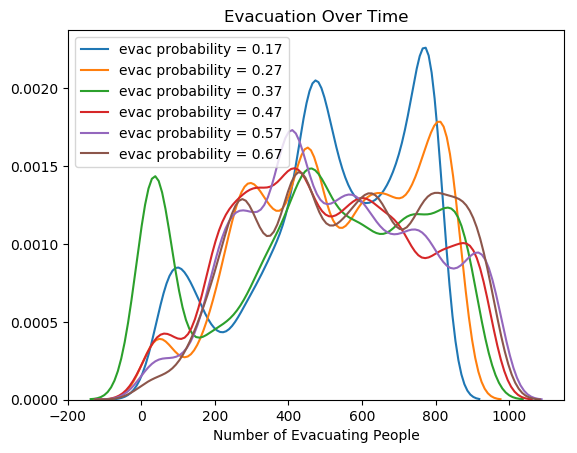

In [9]:
fig, ax = plt.subplots()
#plt.plot(evacdata['time-mins'], evacdata['get-no-evacuating-people'])
probabilities = [0.17, 0.27, 0.37, 0.47, 0.57, 0.67]
for run, probability in zip(evacdata['[run number]'].unique(), probabilities):
    run_data = evacdata[evacdata['[run number]'] == run]
    #plt.plot(run_data['time-mins'], run_data['get-no-evacuating-people'], label=f'evac-probability = {probability}')
    sns.kdeplot(run_data['get-no-evacuating-people'], label=f'evac probability = {probability}')

plt.xlabel('Frequency')
plt.xlabel('Number of Evacuating People')
plt.title('Evacuation Over Time')
#plt.yscale('logit')
plt.legend()
plt.show()

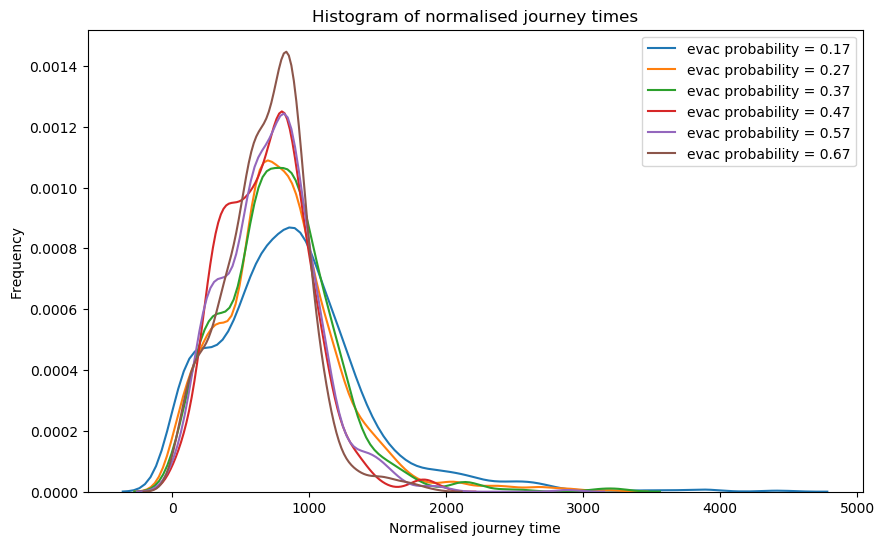

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

#ax.hist(journeytimes['norm_journey_time'], bins=40, density=True)

for probability, data in evacdata.items():
    sns.kdeplot(data['norm_journey_time'], label=f'evac probability = {probability}')#, density=True)
ax.set_title('Histogram of normalised journey times')
ax.set_xlabel('Normalised journey time')
ax.set_ylabel('Frequency')
#ax.set_xscale('log')

plt.show()


/home/amcquaid139/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


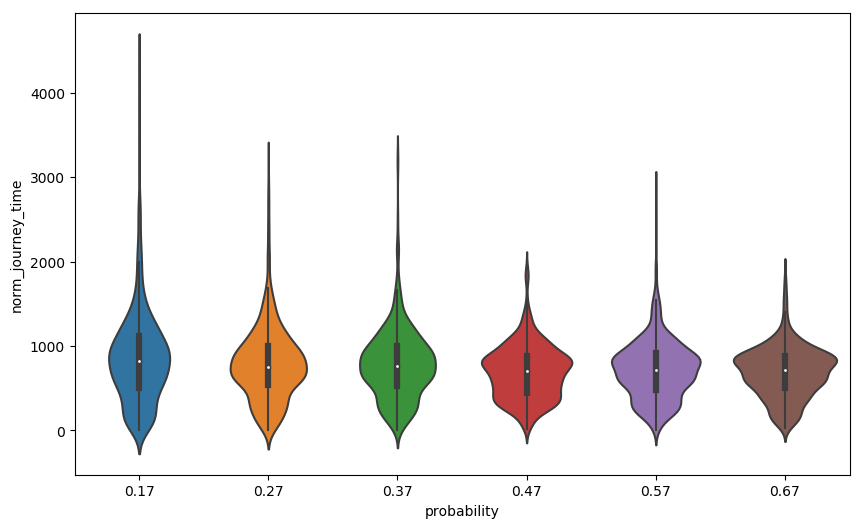

In [3]:
#violin plot for normalised journey times

fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(data=combined_journeytimes, x="probability", y="norm_journey_time")# label='evac probability = 0.17')

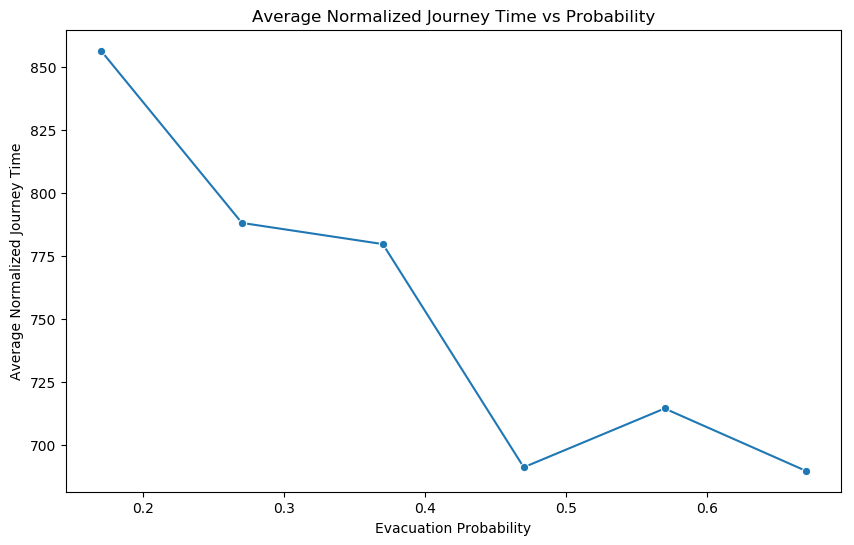

In [25]:
# Calculate the average normalized journey time for each probability
avg_norm_journey_times = {prob: data['norm_journey_time'].mean() for prob, data in journeytimes.items()}

# Convert the dictionary to a DataFrame for easier plotting
avg_norm_journey_times_df = pd.DataFrame(list(avg_norm_journey_times.items()), columns=['Probability', 'Avg_Norm_Journey_Time'])

# Plot the average normalized journey time against probability
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=avg_norm_journey_times_df, x='Probability', y='Avg_Norm_Journey_Time', marker='o')
ax.set_title('Average Normalized Journey Time vs Probability')
ax.set_xlabel('Evacuation Probability')
ax.set_ylabel('Average Normalized Journey Time')
plt.show()

Change the y axis to population density, so it's population vs probability vs evacuated people

Make an identical graph that is population vs probability vs journey time

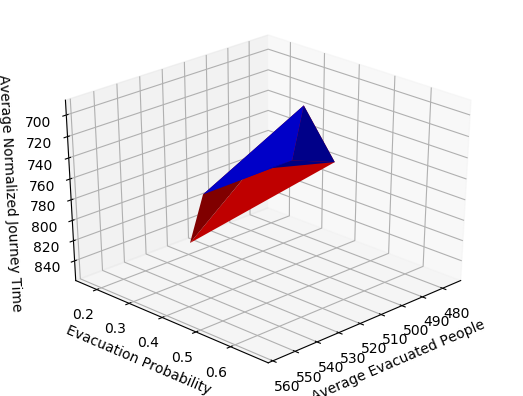

In [ ]:
# plotting the average number of evacuated people after 6 hours vs evacuation probability vs average normalised journey time

# Calculate the average number of evacuating people for each probability
avg_evacuated_people = evacdata.groupby('evacuation-probability')['get-no-evacuating-people'].mean().to_dict()

# Convert the dictionary to a DataFrame for easier plotting
avg_evacuated_people_df = pd.DataFrame(list(avg_evacuated_people.items()), columns=['Probability', 'Avg_Evacuated_People'])

# Plot the average number of evacuated people after 6 hours vs evacuation probability vs average normalized journey time
#fig, ax1 = plt.subplots(figsize=(10, 6))

# color = 'tab:blue'
# ax1.set_xlabel('Evacuation Probability')
# ax1.set_ylabel('Avg Evacuated People', color=color)
# ax1.plot(avg_evacuated_people_df['Probability'], avg_evacuated_people_df['Avg_Evacuated_People'], color=color, marker='o')
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:red'
# ax2.set_ylabel('Avg Normalized Journey Time', color=color)  # we already handled the x-label with ax1
# ax2.plot(avg_norm_journey_times_df['Probability'], avg_norm_journey_times_df['Avg_Norm_Journey_Time'], color=color, marker='x')
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.title('Avg Evacuated People and Avg Normalized Journey Time vs Evacuation Probability')
# plt.show()

# Other palette
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(avg_evacuated_people_df['Avg_Evacuated_People'], avg_evacuated_people_df['Probability'], avg_norm_journey_times_df['Avg_Norm_Journey_Time'], cmap=plt.cm.jet, linewidth=0.01)
ax.view_init(30, 45)
ax.set_xlabel('Average Evacuated People')
ax.set_ylabel('Evacuation Probability')
ax.set_zlabel('Average Normalized Journey Time')
plt.show()

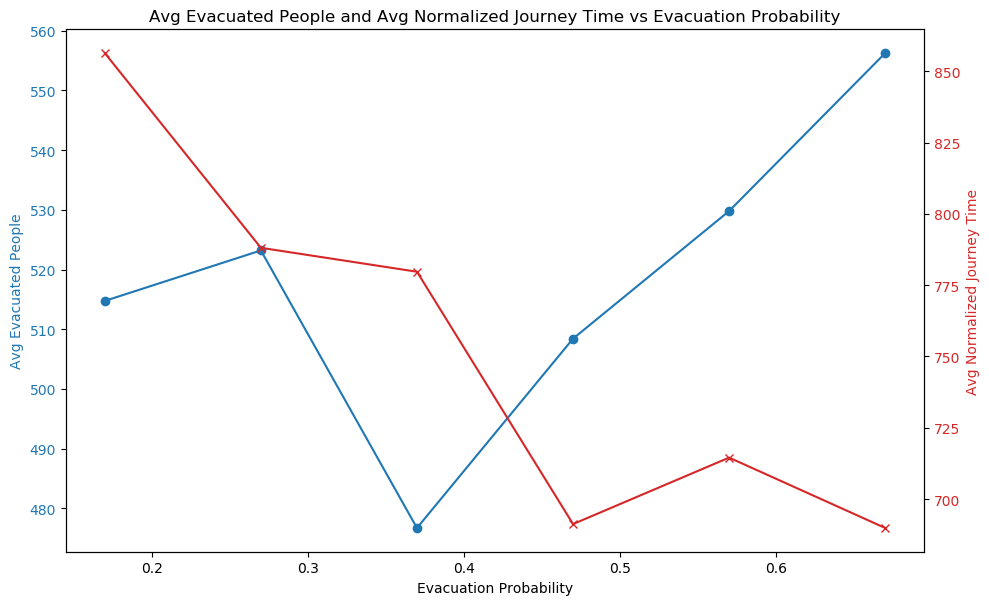

In [42]:
# plotting the average number of evacuated people after 6 hours vs evacuation probability vs average normalised journey time

# Calculate the average number of evacuating people for each probability
avg_evacuated_people = evacdata.groupby('evacuation-probability')['get-no-evacuating-people'].mean().to_dict()

# Convert the dictionary to a DataFrame for easier plotting
avg_evacuated_people_df = pd.DataFrame(list(avg_evacuated_people.items()), columns=['Probability', 'Avg_Evacuated_People'])

# Plot the average number of evacuated people after 6 hours vs evacuation probability vs average normalized journey time
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Evacuation Probability')
ax1.set_ylabel('Avg Evacuated People', color=color)
ax1.plot(avg_evacuated_people_df['Probability'], avg_evacuated_people_df['Avg_Evacuated_People'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Avg Normalized Journey Time', color=color)  # we already handled the x-label with ax1
ax2.plot(avg_norm_journey_times_df['Probability'], avg_norm_journey_times_df['Avg_Norm_Journey_Time'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Avg Evacuated People and Avg Normalized Journey Time vs Evacuation Probability')
plt.show()

# Other palette